In [469]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1) Import Data

In [470]:
df = pd.read_csv('carData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Nous pouvons voir les données sur les voitures, nous avons 9 variables à disposition (features)

### 2) Explore data

Comme expliqué dans le read.me, nous allons modifier les données pour qu'elles soient plus cohérentes pour notre projet.

In [471]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

/tmp/ipykernel_43070/3624401349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
/tmp/ipykernel_43070/3624401349.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
/tmp/ipykernel_43070/3624401349.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


- Moyenne, médiane, quartile

In [473]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5082.811556,8644.115402,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,100.000000,320.000000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35000.000000,92600.000000,500000.000000,2.000000,1.000000,1.000000,3.000000


Variables Continues :

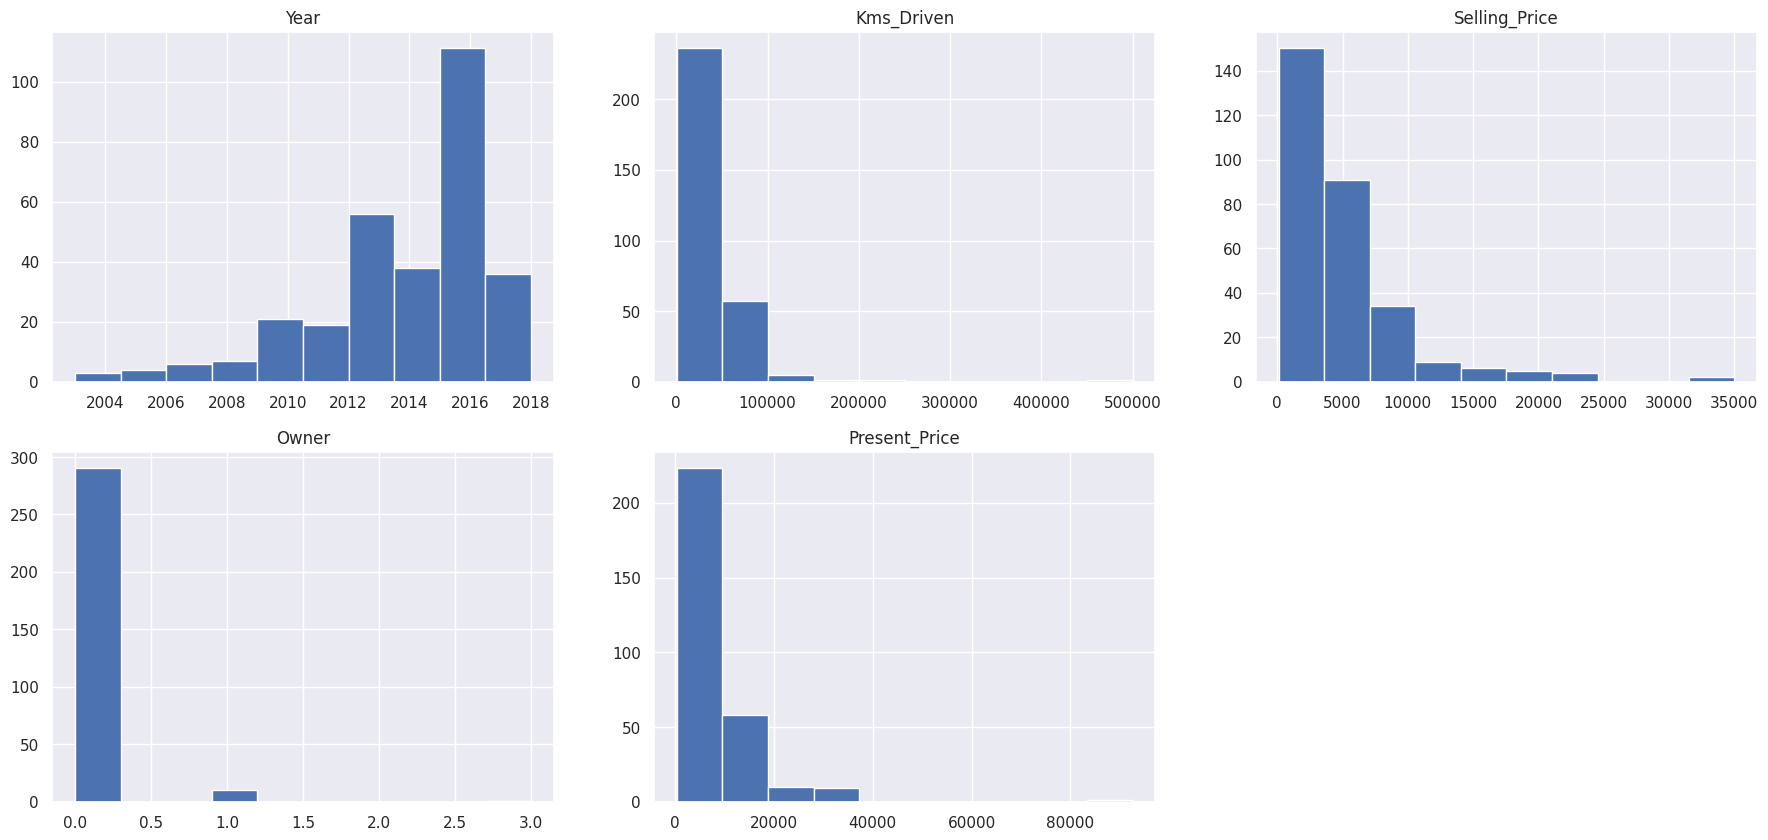

In [474]:
plt.figure(figsize=(22, 10))

cols = ['Year','Kms_Driven','Selling_Price','Owner', 'Present_Price']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)

plt.show()

Variables Discrètes :

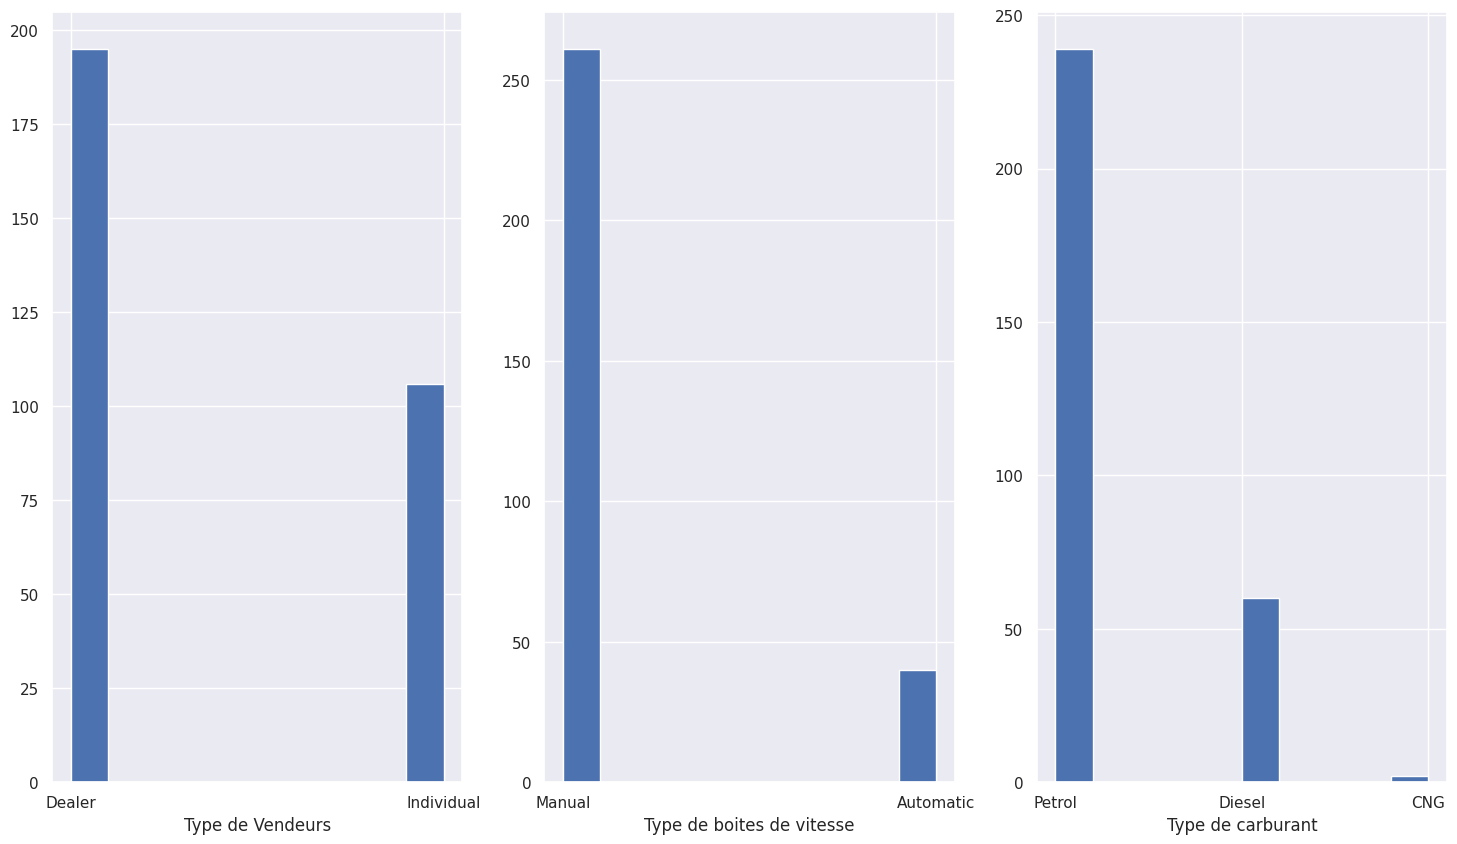

In [475]:
plt.figure(figsize=(18, 10))
plt.subplot(1,3,1)
plt.hist(df['Seller_Type'])
plt.xticks([0, 1], ['Dealer', 'Individual'])
plt.xlabel('Type de Vendeurs')

plt.subplot(1,3,2)
plt.hist(df['Transmission'])
plt.xticks([0, 1], ['Manual', 'Automatic'])
plt.xlabel('Type de boites de vitesse')

plt.subplot(1,3,3)
plt.hist(df['Fuel_Type'])
plt.xticks([0, 1, 2], ['Petrol', 'Diesel', 'CNG'])
plt.xlabel('Type de carburant')

plt.show()


### 3) Catplot

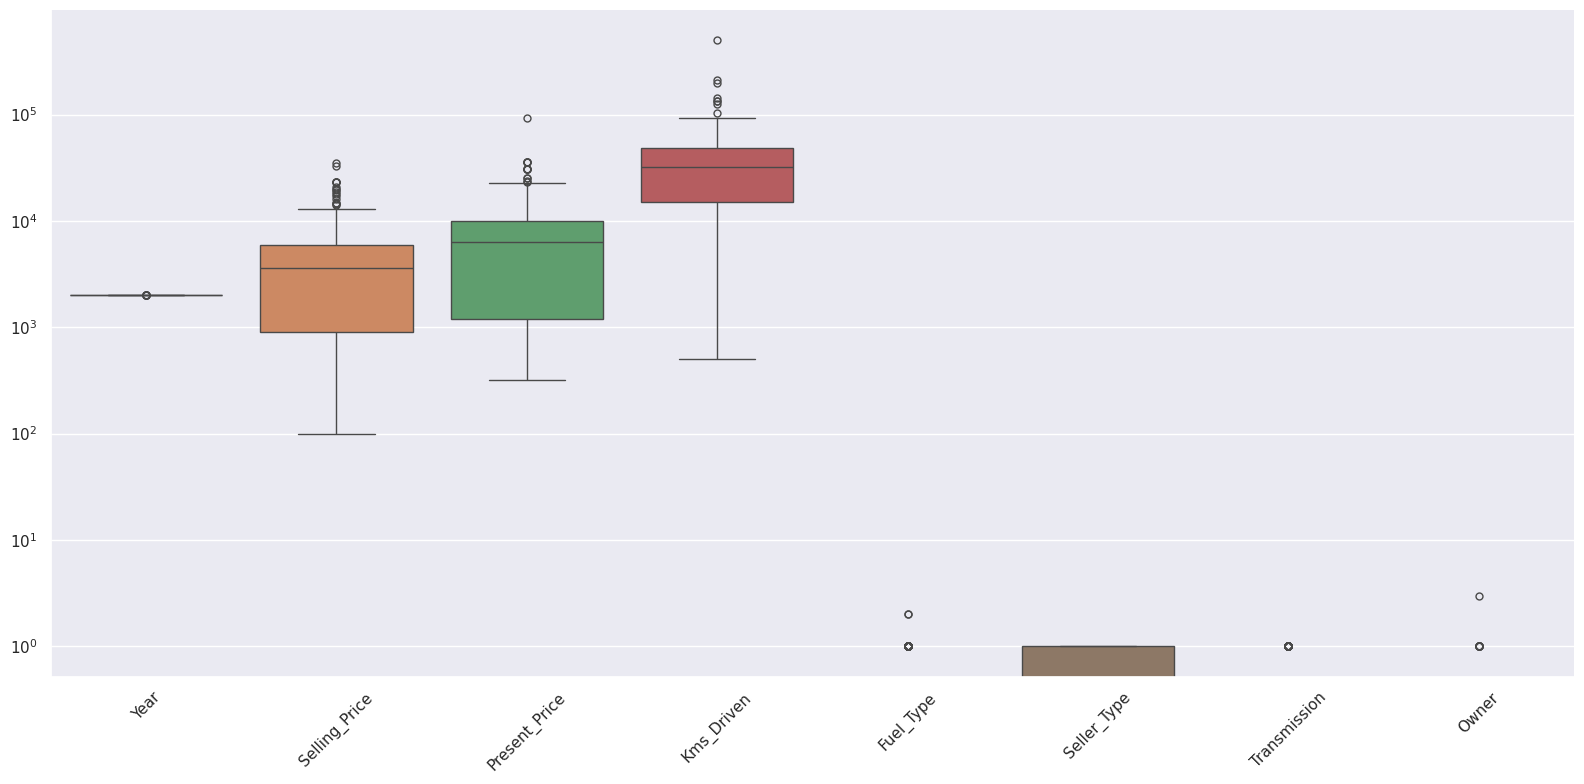

In [476]:

sns.catplot(data=df, kind="box", height=8, aspect=2)  # plus large et plus haut
plt.yscale('log')
plt.xticks(rotation=45)  # rotation des noms de colonnes

plt.tight_layout()
plt.show()


### 4) Corrélations

- Relation entre l'age et le prix de vente

In [477]:
df['Year'].corr(df['Selling_Price'])

np.float64(0.2361409801604273)

<Axes: xlabel='Year', ylabel='Selling_Price'>

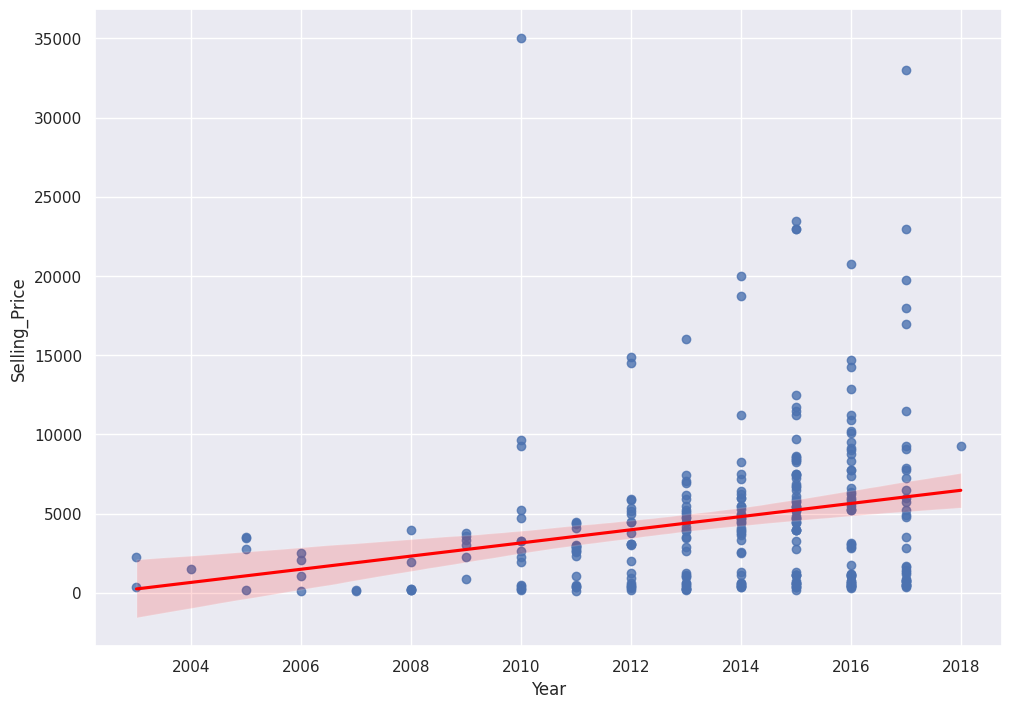

In [478]:
sns.regplot(x=df['Year'], y=df['Selling_Price'], line_kws={"color": "red"} )

La veille est disponible sur le readme.

Nous pouvons voir une corrélation très faible (0.24) entre l'age et le prix de vente, même si on voit qu'il à a une lègére influence. Ce n'est pas un bon prédicteur de prix

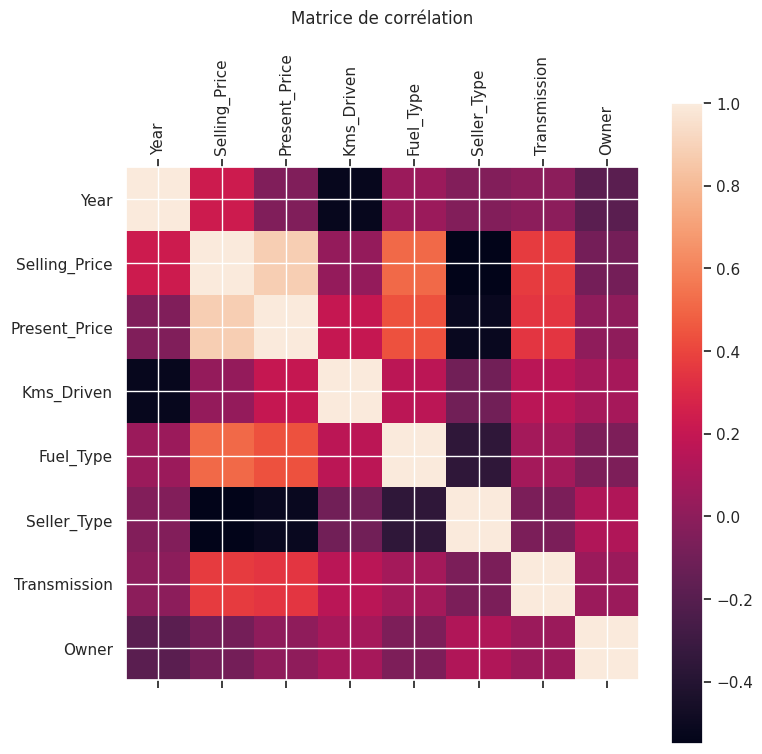

In [479]:
corr = df.corr(numeric_only=True)

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.show()
# Mettre des nombres à l'intérieur des des cases au lieu des couleurs.

In [497]:
int_corr = df.select_dtypes(include=['number']).corr ()
int_corr[((int_corr <= -0.3) | (int_corr >= 0.3))]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,NaN,NaN,-0.524342,NaN,NaN,NaN,NaN
Selling_Price,NaN,1.000000,0.878983,NaN,0.509467,-0.550724,0.367128,NaN
Present_Price,NaN,0.878983,1.000000,NaN,0.440415,-0.512030,0.348715,NaN
Kms_Driven,-0.524342,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Fuel_Type,NaN,0.509467,0.440415,NaN,1.000000,-0.352415,NaN,NaN
Seller_Type,NaN,-0.550724,-0.512030,NaN,-0.352415,1.000000,NaN,NaN
Transmission,NaN,0.367128,0.348715,NaN,NaN,NaN,1.000000,NaN
Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Certaines colonnes tels que Transmission, Seller_Type et Fuel_Type, étaient en type Stirngs. Nous les avons donc changé en interger, ou, un integer correspond à un type de donnée (ex : 1 pour Automatic pour transmission). Notre jeux de donnée est maintenant adapté pour effectuer de la régréssion linéaire.

### 5) Linear Regression

In [481]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Séparation des données test et train

In [482]:
X_train, X_test, y_train, y_test = train_test_split(df['Year'].values.reshape(-1,1), df['Selling_Price'], test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (61, 1), (240,), (61,))

Régréssion linéaire entrainé sur des données puis appliqués sur d'autres

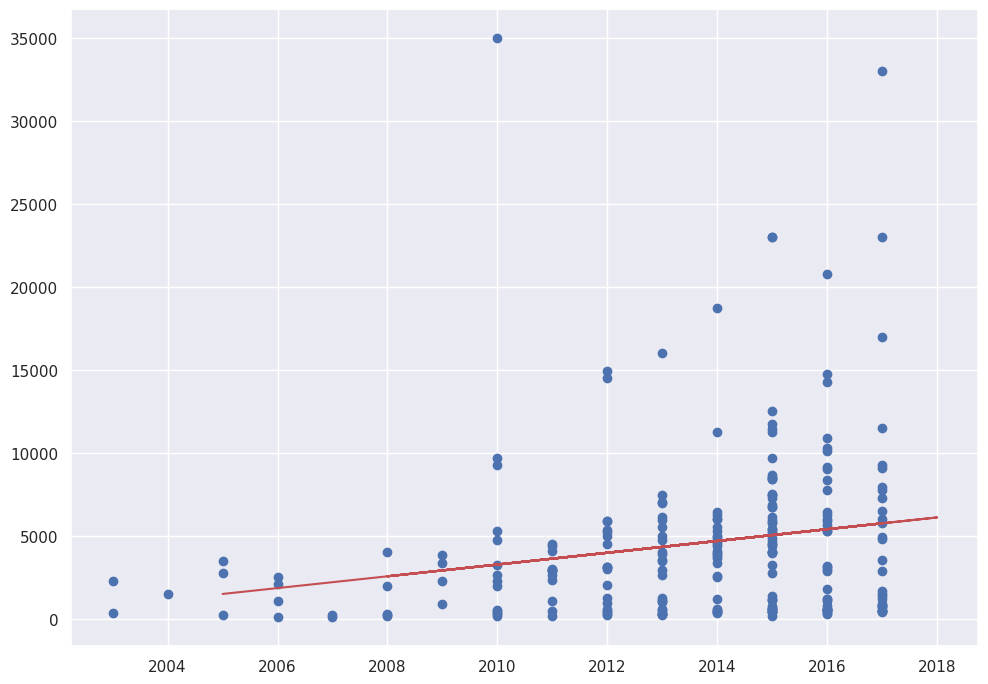

In [483]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, predictions, color='r')

### 6) Upgrade model

(301, 1) (301,)


Text(0.5, 0, 'KMS driven')

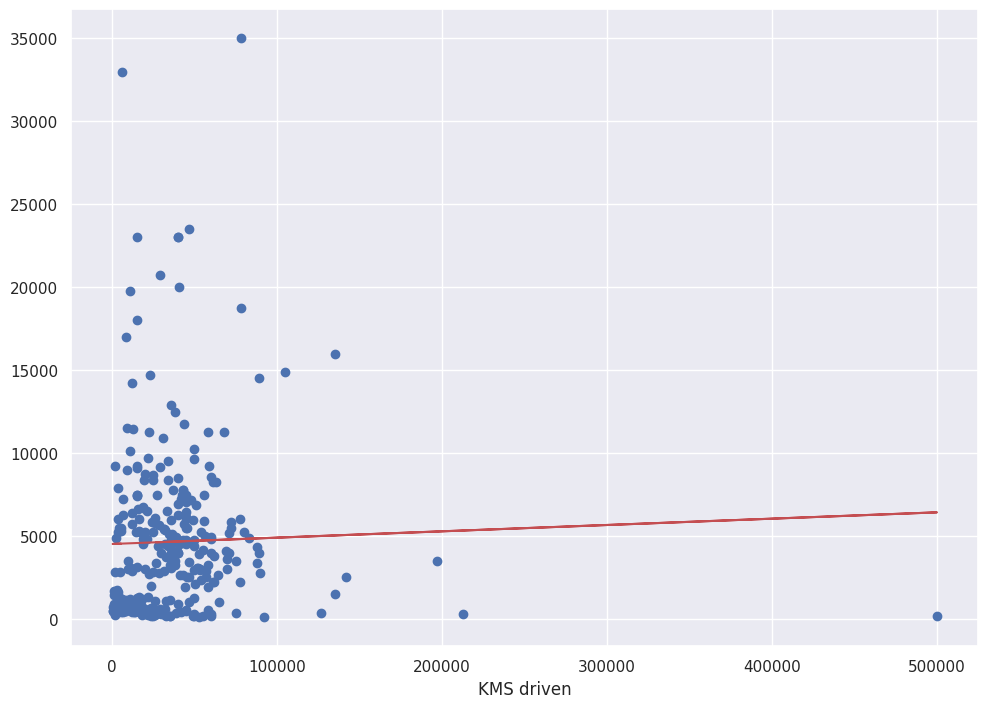

In [484]:
X = df['Kms_Driven'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")
# Éliminer les valeurs abérantes, blibliotéques qui nous le fait


(301, 1) (301,)


''

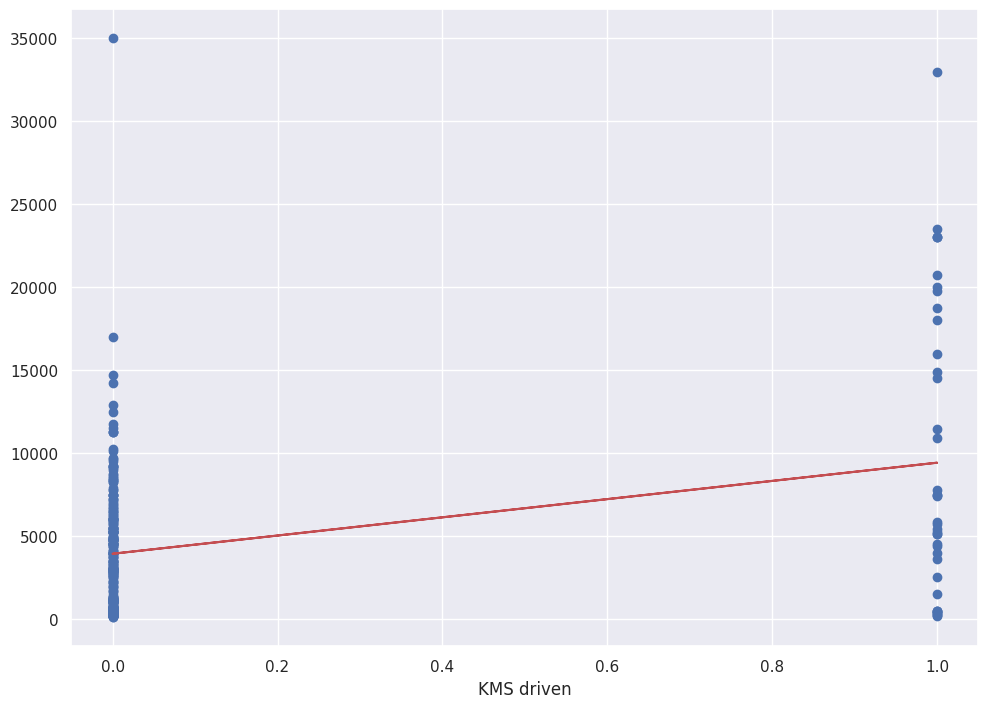

In [485]:
X = df['Transmission'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")
# Juste dire que ça n'a aucune corrélation
""

Cette régression est inutile car ces données sont composés de 0 ou 1, ces valeurs ne sont pas adapté pour une régression linéaire, ce n'est pas corrélés et ça ne veut rien dire.

In [486]:
X = df[['Kms_Driven','Transmission']].values
y = df['Selling_Price'].values

model = LinearRegression()
model.fit(X,y)
print("score du R2: ", model.score(X,y))

predict2 = model.predict(X)

print("min : ",predict2.min(), "max : ", predict2.max(), "moyenne : ", predict2.mean())


score du R2:  0.13573660748173266
min :  3201.5947344564993 max :  9635.053228768149 moyenne :  4661.295681063124


### 7) KPI 

In [487]:
from icecream import ic

In [488]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 2), (61, 2), (240,), (61,))

In [490]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
multi_model.score(X_train, y_train)
multi_predictions = multi_model.predict(X_test)

In [491]:
r2 = r2_score(y_test, multi_predictions)
mae = mean_absolute_error(y_test, multi_predictions)
mse = mean_squared_error(y_test, multi_predictions)
rmse = np.sqrt(mse)
ic(r2, mae, mse, rmse)

ic| r2: 0.26029554874590144
    mae: 3315.713630156559
    mse: 18697745.062201645
    rmse: np.float64(4324.088928572312)


(0.26029554874590144,
 3315.713630156559,
 18697745.062201645,
 np.float64(4324.088928572312))

### 8) Analyse

In [492]:
def make_linear_regression(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    multi_model = LinearRegression()
    multi_model.fit(X_train, y_train)
    multi_model.score(X_train, y_train)
    multi_predictions = multi_model.predict(X_test)
    r2 = r2_score(y_test, multi_predictions)
    mae = mean_absolute_error(y_test, multi_predictions)
    mse = mean_squared_error(y_test, multi_predictions)
    rmse = np.sqrt(mse)
    ic(r2, mae, mse, rmse)
    return multi_predictions, y_test

In [493]:
X = df[['Present_Price', 'Fuel_Type', 'Year']].values
make_linear_regression(X, df['Selling_Price'])

ic| r2: 0.8970784918883655
    mae: 1160.7830991680223
    mse: 2601579.7482711123
    rmse: np.float64(1612.9413344170682)


(array([ 7287.24587435,  -209.92691461,  3949.69754612,  8792.951295  ,
        13131.89344888,  4539.46546341,  3082.09392713,  1967.24718969,
         3543.72550974,  4320.74516226,  1581.13429665,  2157.0787966 ,
         4872.96071135,  5961.91257944,  8408.54229099, 13154.36456308,
         5740.15037715,  3991.11972184,  -103.62121473,  3031.59412426,
         3199.44874561,  4411.32912874,  4782.37674487,  8160.50336534,
        -1630.88966776,  2566.50668732,  -228.43549628,  1352.4603857 ,
          329.53562684,  5612.47607194,  3740.43672615,  7062.90380038,
         1252.79879207,  7506.84215814,  3220.59782479,  2418.09725611,
         5360.48716332,  6551.64839754, -1630.88966776,  9008.67777127,
         8876.20959962, 19430.43299098,  3949.69754612,  4628.34554085,
         6189.67840856,  9742.10932958,   596.58981237,  2261.48618041,
         5019.66625352,  6912.32845069,  6496.89693314,  3808.61377678,
         4782.37674487, 19892.0645736 ,  2418.09725611,  1942.22

Pour analyser les variables les plus impactantes sur la prédiction, il faut sélectionner les variables qui nous donnent les meilleurs indicateurs. Après avoir tester plusieurs combinaisons, nous avons conclu que la meilleure était, “Present_Price”, “Fuel_Type” et “Year”. Notamment par rapport au R2 qui est un des plus pertinent pour les problèmes de régressions Linéaires.

### 9) Condition

On filtre le dataframe

In [494]:
df_filtered = df[
    (df['Year'] > df['Year'].max() - 7) &
    (df['Kms_Driven'] <= 100000) &
    (df['Transmission'] == 0)
]

df_filtered.shape

(210, 9)

In [495]:
X_train = df[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
X_test = df_filtered[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
y_test = df_filtered['Selling_Price']
y_train = df['Selling_Price']

ic(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

ic| X_train.shape: (301, 7)
    X_test.shape: (210, 7)
    y_test.shape: (210,)
    y_train.shape: (301,)


((301, 7), (210, 7), (210,), (301,))

In [496]:
last_model = LinearRegression()
last_model.fit(X_train, y_train)
last_model.score(X_train, y_train)
last_predictions = last_model.predict(X_test)
last_predictions.mean()

np.float64(4290.4715118634585)

Nous avons donc éstimé que Martin devra dépensé environ 4290€, pour la voiture respectant ces caractéristiques.